In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/aweglteo/tokyo_weather_data/main/data.csv",
    parse_dates=True,
    index_col=0,
)

In [4]:
df.head()

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain
2018-05-17,9.0,3.7,24.0,28.4,21.4,0.0
2018-05-18,7.8,3.0,23.4,27.1,20.0,0.0
2018-05-19,7.5,3.9,21.5,26.3,15.3,0.0
2018-05-20,4.3,3.5,16.8,22.1,13.1,0.0
2018-05-21,10.0,2.4,20.3,27.2,13.7,0.0


In [5]:
df["cloud_lag1"] = df["cloud"].shift(1)
df["wind_lag1"] = df["wind"].shift(1)
df["ave_tmp_lag1"] = df["ave_tmp"].shift(1)
df["max_tmp_lag1"] = df["max_tmp"].shift(1)
df["min_tmp_lag1"] = df["min_tmp"].shift(1)
df["rain_lag1"] = df["rain"].shift(1)

In [6]:
df = df.dropna()

In [7]:
feature_cols = [
    "cloud_lag1",
    "wind_lag1",
    "ave_tmp_lag1",
    "max_tmp_lag1",
    "min_tmp_lag1",
    "rain_lag1",
]
target_col = "rain"

X = df[feature_cols]
y = df[target_col]

In [8]:
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [11]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

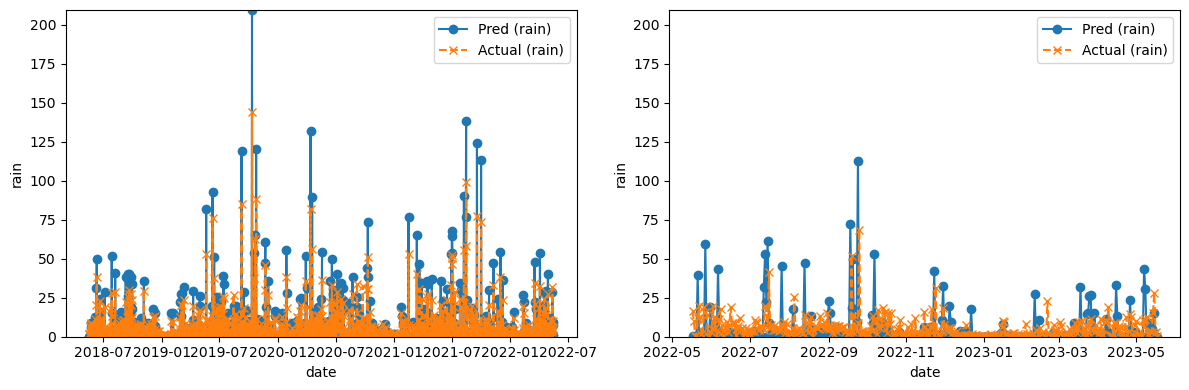

In [12]:
plot_data = [
    {
        "name": "train",
        "true": {"x": y_train.index, "y": y_train},
        "pred": {"x": y_train.index, "y": y_train_pred},
    },
    {
        "name": "test",
        "true": {"x": y_test.index, "y": y_test},
        "pred": {"x": y_test.index, "y": y_test_pred},
    },
]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, data in zip(axes, plot_data):
    ax.plot(data["true"]["x"], data["true"]["y"], label="Pred (rain)", marker="o")
    ax.plot(
        data["pred"]["x"],
        data["pred"]["y"],
        label="Actual (rain)",
        marker="x",
        linestyle="--",
    )
    ax.set_xlabel("date")
    ax.set_ylabel("rain")
    ax.set_ylim(0, y.max())
    ax.legend()
fig.tight_layout()

In [14]:
mse = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"\nTest MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")


Test MSE: 6.76
Test R^2: -0.13
